In [7]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [8]:
def Get_statistics(name,sep=','):   
    x = pd.read_csv(name,sep=sep)
    mean_reward = []
    max_reward =[]
    iteration = []
    current = []

    episodes = 0
    for i in range(x.shape[0]):
        episodes+= x.iloc[i,1]
        current.append(x.iloc[i,2])
        if episodes>=100:
            episodes =0
            current = np.array(current)
            mean_reward.append(np.mean(current))
            max_reward.append(np.max(current))
            iteration.append(x.iloc[i,0]/10000)

            current = []

    if episodes>0:
        episodes =0
        current = np.array(current)
        mean_reward.append(np.mean(current))
        max_reward.append(np.max(current))
        iteration.append(x.iloc[i,0]/10000)
        current = []
    return mean_reward,max_reward,iteration

In [9]:
mean_reward1,max_reward1,iteration1 = Get_statistics('data/pong_PongNoFrameskip-v4_try_1/0/log.txt',sep='\t')
mean_reward2,max_reward2,iteration2 = Get_statistics('data/150k.out')
mean_reward3,max_reward3,iteration3 = Get_statistics('data/300k.out')
mean_reward4,max_reward4,iteration4 = Get_statistics('data/1M.out')

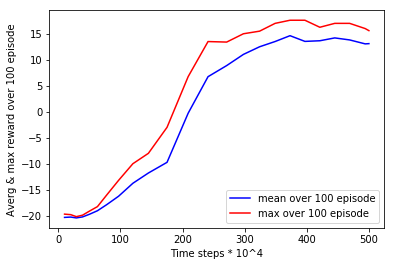

In [4]:
plt.plot(iteration,mean_reward,c='b',label='mean over 100 episode')
plt.plot(iteration,max_reward,c='r',label='max over 100 episode')
plt.xlabel('Time steps * 10^4')
plt.ylabel('Averg & max reward over 100 episode')
plt.legend()
#plt.savefig('DDQN.png')

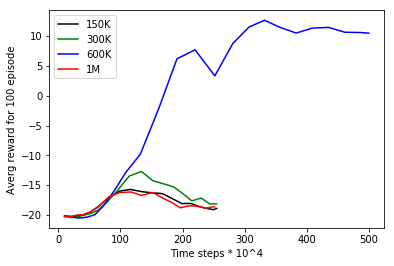

In [19]:
plt.plot(iteration2,mean_reward2,c='black',label='150K')
plt.plot(iteration3,mean_reward3,c='G',label='300K')
plt.plot(iteration1,mean_reward1,c='b',label='600K')
plt.plot(iteration4,mean_reward4,c='R',label='1M')
#plt.plot(iteration,max_reward,c='r',label='max over 100 episode')
plt.xlabel('Time steps * 10^4')
plt.ylabel('Averg reward for 100 episode')
plt.legend()
plt.savefig('All.png')